# Automatic number plate recognition (ANPR) with Yolov9 and EasyOCR

In [ ]:
!nvidia-smi

Mon May 19 17:26:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

 To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

 YOLOv9 is very new. At the moment, recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.81 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00


data: https://universe.roboflow.com/arvind-kumar-wjygd/anpr2-syxl7

Install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00


## Download model weights

The YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x 2 root root      4096 Oct 26 05:44 .
drwxr-xr-x 1 root root      4096 Oct 26 05:44 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


## Authenticate and Download the Dataset

 The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
import roboflow

roboflow.login()

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xdKeq8bkkxXAI43sglmI")
project = rf.workspace("arvind-kumar-wjygd").project("anpr2-syxl7")
version = project.version(8)
dataset = version.download("yolov9")


visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ANPR2-8 in yolov9:: 100%|██████████| 626/626 [00:00<00:00, 6719.28it/s]


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data ANPR2-8/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-26 05:46:15.210074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 05:46:15.227196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 05:46:15.233178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 05:46:15.248588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-26 05:46:16.452044: W

## Examine Training Results

 By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ...

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    opt.yaml	  train_batch0.jpg
events.out.tfevents.1729921609.2c15d447f4d8.1472.0  P_curve.png   train_batch1.jpg
F1_curve.png					    PR_curve.png  train_batch2.jpg
hyp.yaml					    R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				    results.csv   val_batch0_pred.jpg
labels.jpg					    results.png   weights


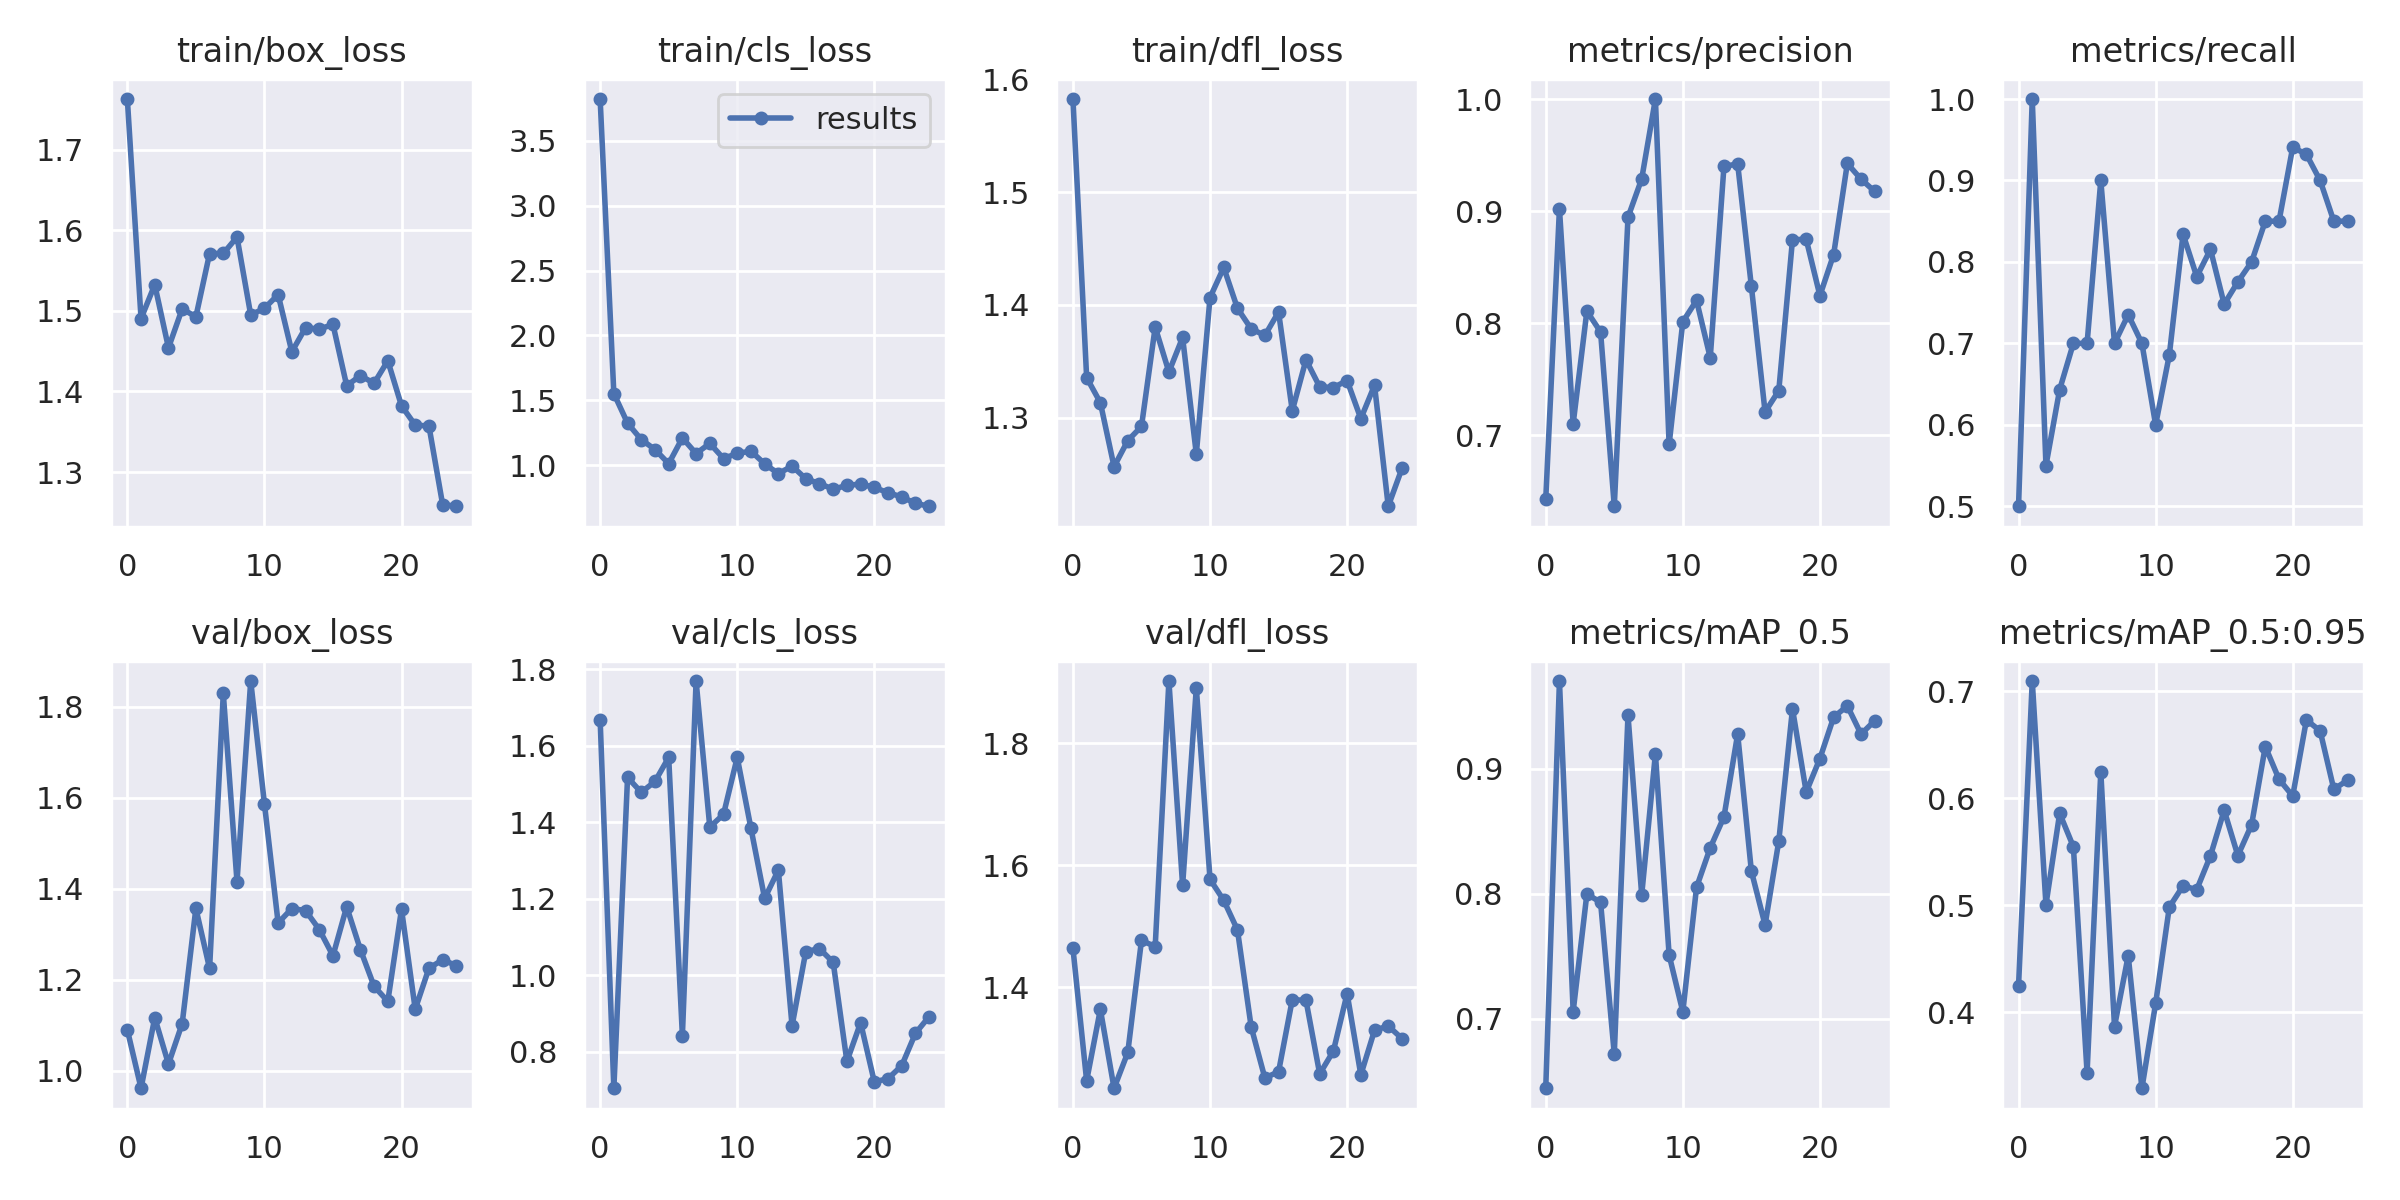

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

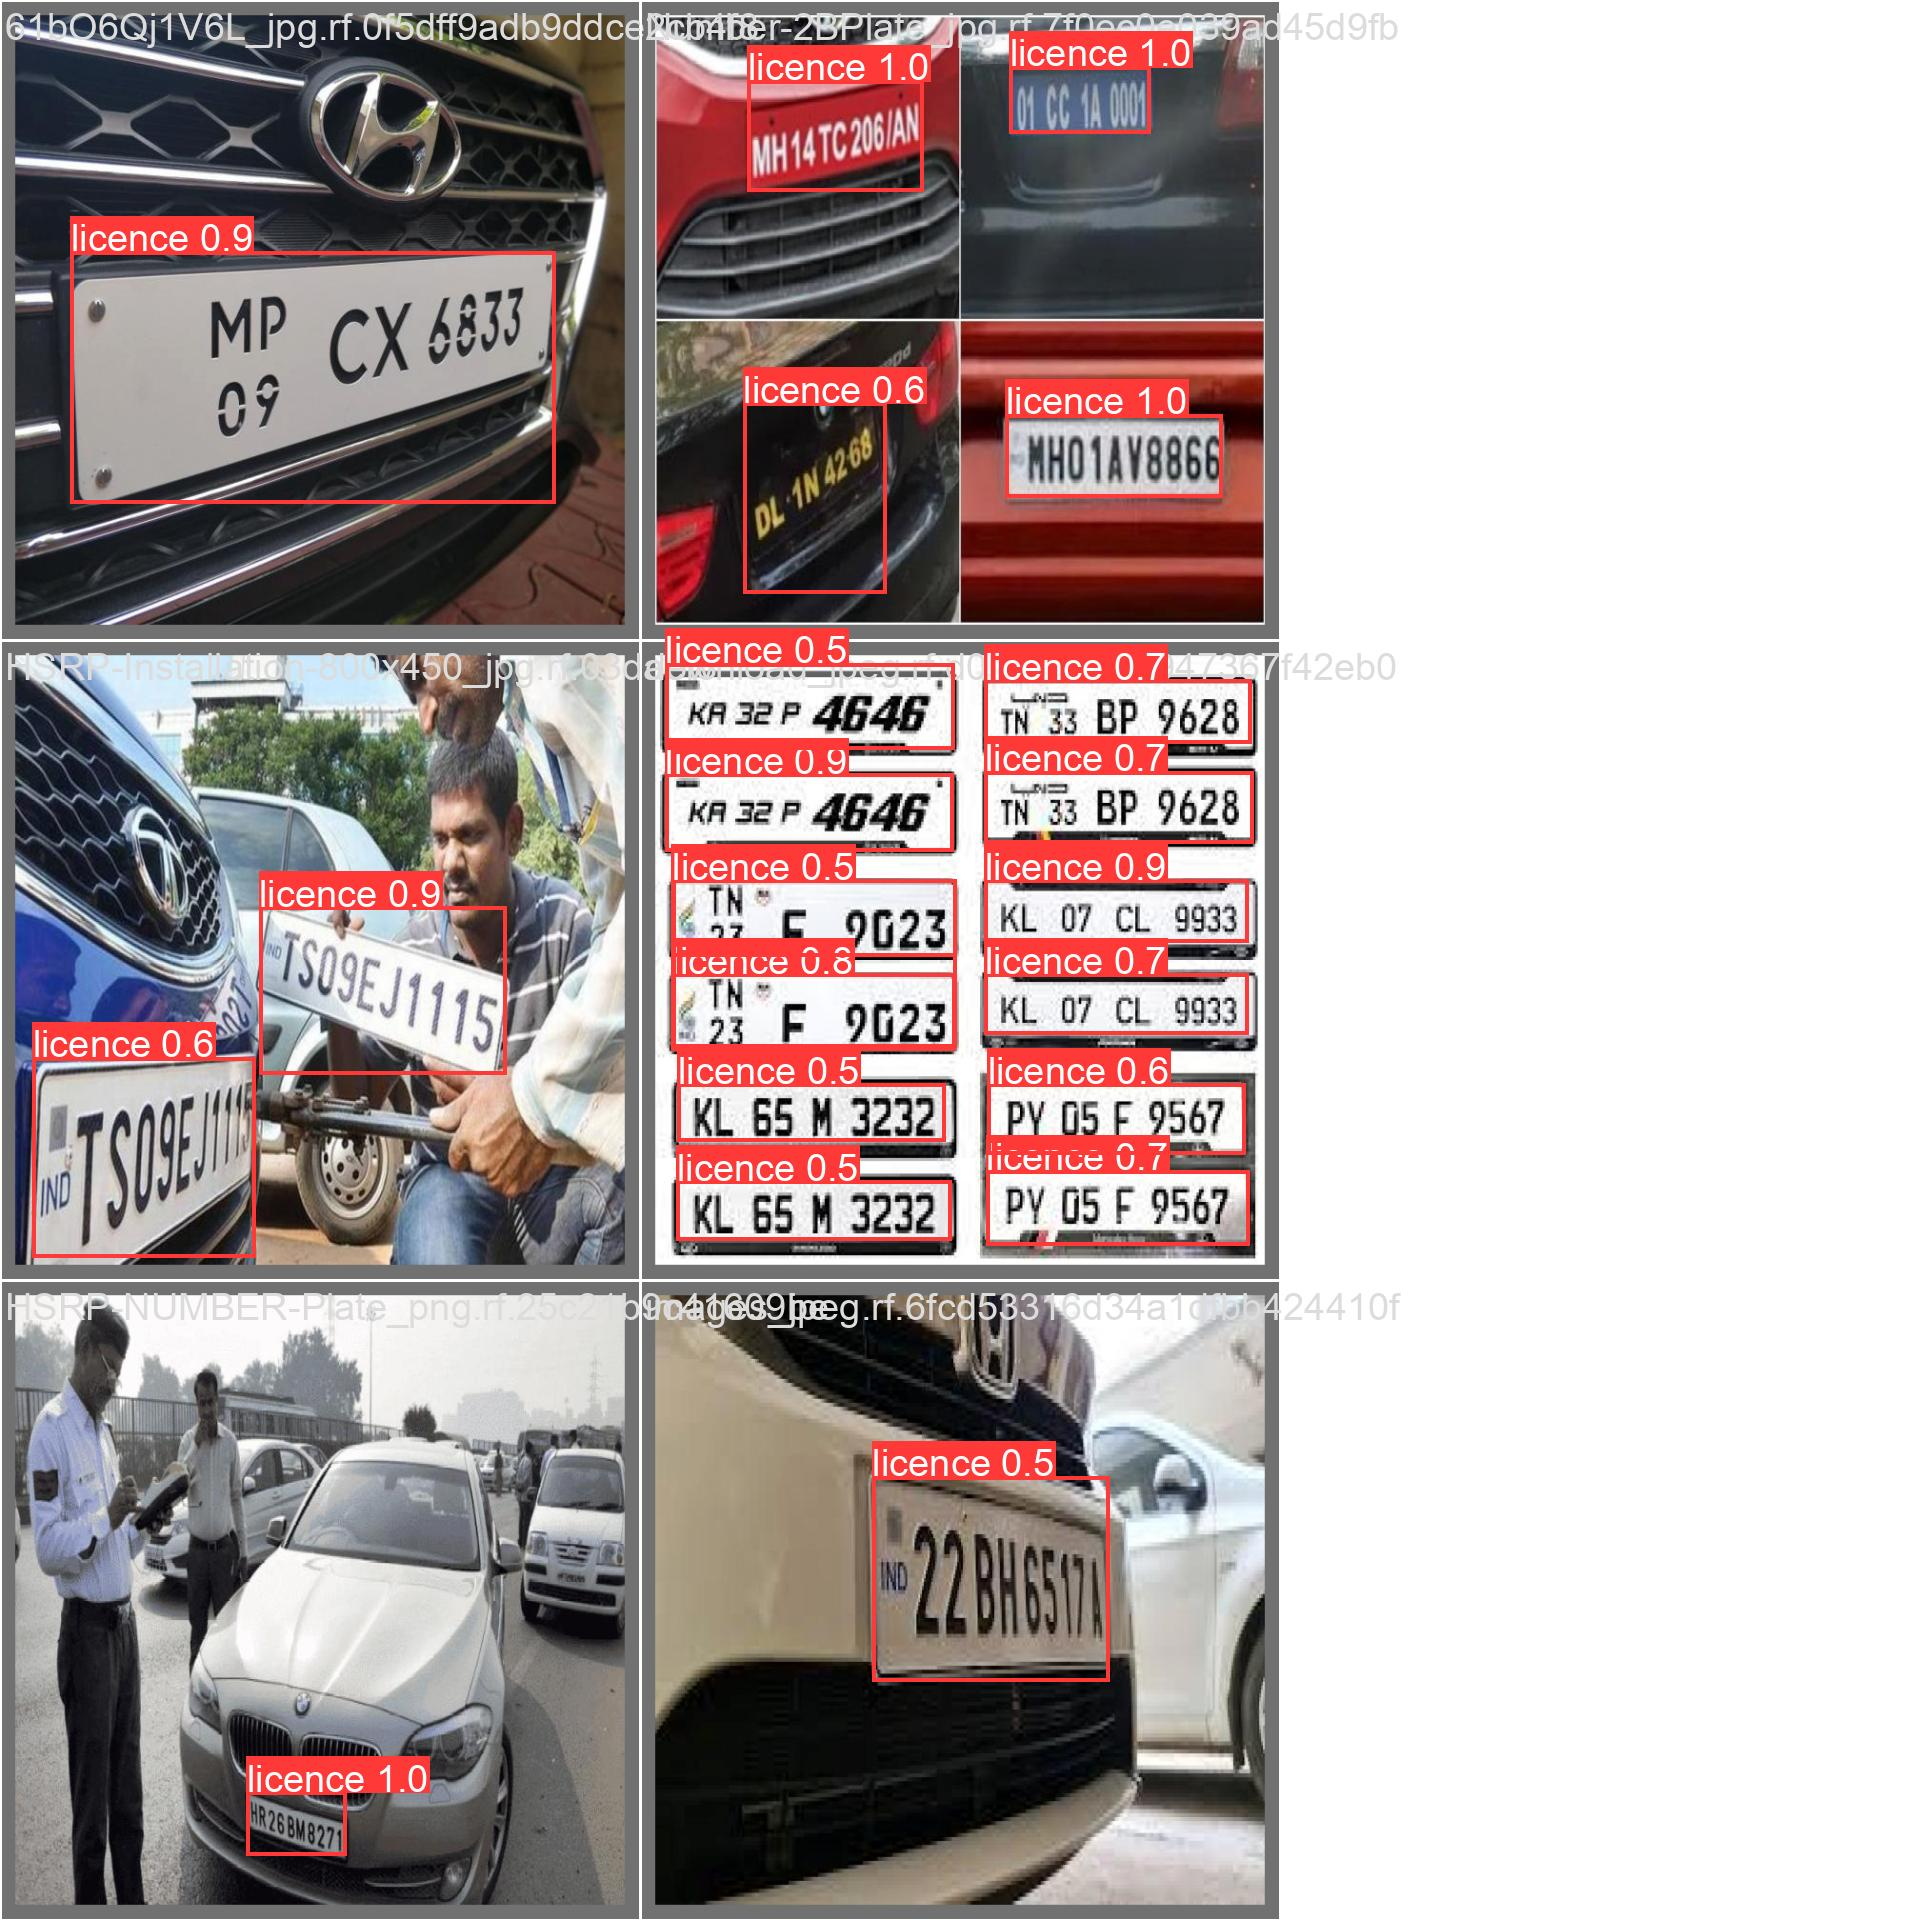

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/ANPR2-8/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions t

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/ANPR2-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, th

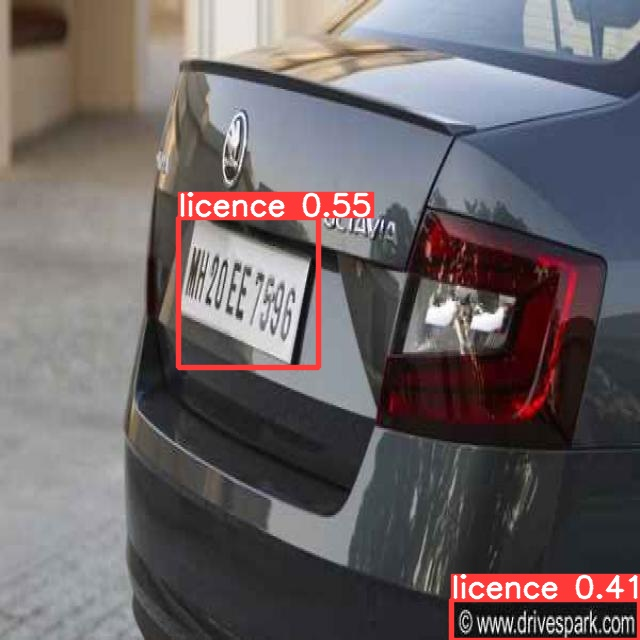

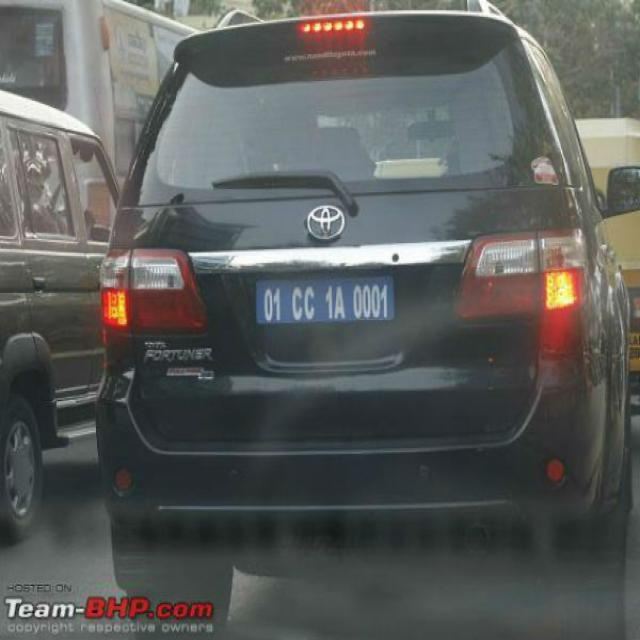

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [ ]:
# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp/weights/best.pt --source srm.mp4


detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=srm.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_o

# Yolo v9 + easyOCR

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 26.5 MB/s eta 0:00:00


In [ ]:
# video

!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp/weights/best.pt --source srm.mp4


Progress: |██████████████████████████████████████████████████| 100.0% CompleteDownloading recognition model, please wait. This may take several minutes depending upon your network connection.
Progress: |██████████████████████████████████████████████████| 100.0% Completeanpr: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=srm.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle modu

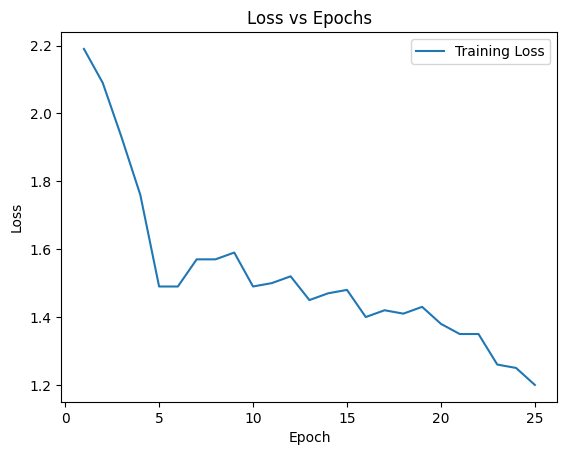

In [ ]:
# Python Code to Plot Loss vs Epochs (25 epochs)
import matplotlib.pyplot as plt

epochs = list(range(1, 26))  # 2
loss = [2.19, 2.09, 1.93, 1.76, 1.49, 1.49, 1.57, 1.57, 1.59, 1.49, 1.50, 1.52,
        1.45, 1.47, 1.48, 1.40, 1.42, 1.41, 1.43, 1.38, 1.35, 1.35, 1.26, 1.25, 1.20]  # Added one more value

plt.plot(epochs, loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


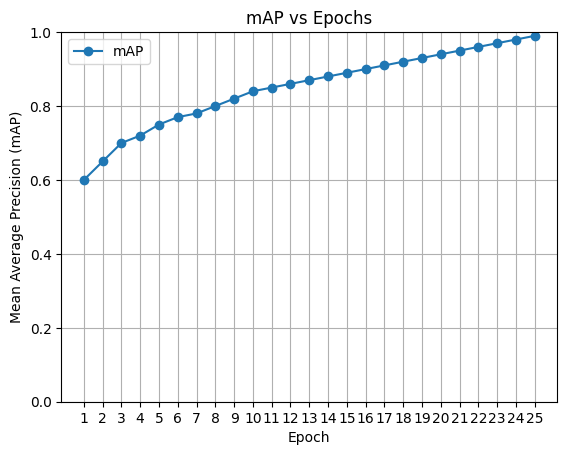

In [ ]:
# Python Code to Plot mAP vs Epochs
import matplotlib.pyplot as plt


epochs = list(range(1, 26))
map_values = [0.60, 0.65, 0.70, 0.72, 0.75, 0.77, 0.78, 0.80,
              0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90,
              0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

plt.plot(epochs, map_values, marker='o', label='mAP')

plt.xlabel('Epoch')
plt.ylabel('Mean Average Precision (mAP)')
plt.title('mAP vs Epochs')
plt.xticks(epochs)
plt.ylim(0, 1)
plt.grid()
plt.legend()


plt.show()

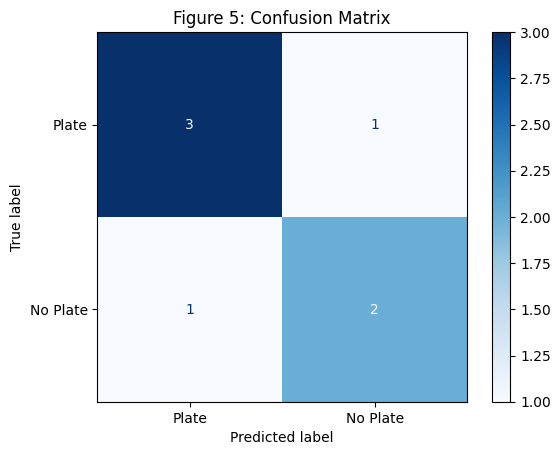

In [ ]:
# Python Code to Plot Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


true_labels = ['Plate', 'Plate', 'No Plate', 'Plate', 'No Plate', 'Plate', 'No Plate']
predicted_labels = ['Plate', 'No Plate', 'No Plate', 'Plate', 'Plate', 'Plate', 'No Plate']


cm = confusion_matrix(true_labels, predicted_labels, labels=['Plate', 'No Plate'])


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Plate', 'No Plate'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Figure 5: Confusion Matrix')
plt.show()

In [ ]:
import os


def find_image_files(directory, extensions=('.jpg', '.jpeg', '.png')):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extensions):
                image_paths.append(os.path.join(root, file))
    return image_paths


directory_to_search = '.'


image_paths = find_image_files(directory_to_search)

# Print the full paths of the images found
if image_paths:
    print("Images found in the directory:")
    for image_path in image_paths:
        print(image_path)
else:
    print("No image files found in the directory.")


Images found in the directory:
./ANPR2-8/test/images/Cars422_png.rf.7ae38fcf9ed94b00fbc9a016062cde0d.jpg
./ANPR2-8/test/images/Cars427_png.rf.cb950eea7dfc4cfb9c2797c392f372cc.jpg
./ANPR2-8/test/images/Cars429_png.rf.af1f0e299da45111ae51ae9d617503a5.jpg
./ANPR2-8/test/images/images-1-_jpeg.rf.548e70bbcb387616341bf2f57edce4de.jpg
./ANPR2-8/test/images/Cars412_png.rf.23df9b6cd177dad7b799613dcfa3ee18.jpg
./ANPR2-8/test/images/Cars428_png.rf.5388ec5a7d5dea5f858b024f5037b307.jpg
./ANPR2-8/test/images/Cars431_png.rf.4900e92f18c10d55d69d2064a1cae796.jpg
./ANPR2-8/test/images/Cars426_png.rf.64701917f4ee05ed34f19840d21dc044.jpg
./ANPR2-8/test/images/Cars423_png.rf.c1c1cb1e877f57f39f70d7cb7c83e4ed.jpg
./ANPR2-8/test/images/Cars416_png.rf.d42d2254cbd2f129c5810f4fae113972.jpg
./ANPR2-8/test/images/Cars424_png.rf.72bf97d200877421ef7a5939abd6f3b5.jpg
./ANPR2-8/test/images/Cars432_png.rf.713cbdbe709e5293bc902c7f5d2d555b.jpg
./ANPR2-8/test/images/Cars419_png.rf.a89eab3a57b95c61cb06e83a0b53b865.jpg
./AN